## Dataset Description

This dataset contains 10,000 records of the most popular songs that have dominated the music scene from the 1960s to the present day. The content is sourced from ARIA (Australian Recording Industry Association) and Billboard. The dataset provides comprehensive musical representation, allowing extraction of valuable information about musical evolution.

### Variable Description

- **Explicit**: Indicates whether the song contains heavy language such as swearing, drug references/use, profanity, and violence.
- **Popularity**: Represents the popularity of a track, ranging from 0 to 100, where 100 is the most popular.
- **Danceability**: Describes how suitable a track is for dancing. A value closer to 0.0 indicates less danceable, while closer to 1.0 indicates more danceable.
- **Energy**: Represents the intensity and activity percentage of the music, ranging from 0 to 1. A high value suggests fast and energetic music.
- **Key**: Represents the musical notes or scale forming the basis of a song. The 12 tones range from 0 to 11.
- **Loudness**: Indicates how loud or quiet the average volume of a song is. Lower values suggest softer and calmer music, while higher values may indicate more energetic and louder music.
- **Mode**: Represents whether the song is major or minor. 1.0 represents the major mode, and 0 represents the minor mode.
- **Speechiness**: Detects the presence of spoken words in a track.
- **Acousticness**: Describes how acoustic a song is. A score of 1.0 indicates that the song is more likely to be acoustic.
- **Instrumentalness**: Represents the amount of vocals in the music. Closer to 1.0 suggests more instrumental music.
- **Liveness**: Describes the probability of the music being recorded with a live audience.
- **Valence**: Describes the musical positivity conveyed by a track.
- **Tempo**: Represents the speed or pace of the music.
- **Time Signature**: A notation convention specifying how many beats are in each measure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import re

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
songs = pd.read_csv('top_10000_1960-now.csv')

In [4]:
songs.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346bc1f268730f607f9544,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communications"
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73ab8423a350faa5d395a,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Sony Music Entertainment"
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e49866860c25afffe2f1a02,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. One + Percy (Super Deluxe)",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c5307ccbbb74101e0cc77,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG Company, P ℗ 2014 Sanctuary Records Group Ltd., a BMG Company"
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d92707b0e7da0c493f5b86,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ABKCO Music & Records Inc."


In [5]:
songs.shape

(9999, 35)

In [6]:
songs.dtypes

Track URI                object
Track Name               object
Artist URI(s)            object
Artist Name(s)           object
Album URI                object
Album Name               object
Album Artist URI(s)      object
Album Artist Name(s)     object
Album Release Date       object
Album Image URL          object
Disc Number               int64
Track Number              int64
Track Duration (ms)       int64
Track Preview URL        object
Explicit                   bool
Popularity                int64
ISRC                     object
Added By                 object
Added At                 object
Artist Genres            object
Danceability            float64
Energy                  float64
Key                     float64
Loudness                float64
Mode                    float64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Sig

## Data Extraction and Cleaning

In [7]:
songs.isnull().sum()

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [8]:
# Get the number of unique values in each column
unique_values_count = songs.nunique()
unique_values_count

Track URI               9951
Track Name              8258
Artist URI(s)           4134
Artist Name(s)          4129
Album URI               7462
Album Name              6636
Album Artist URI(s)     3298
Album Artist Name(s)    3294
Album Release Date      3332
Album Image URL         7460
Disc Number               10
Track Number              57
Track Duration (ms)     7320
Track Preview URL       6889
Explicit                   2
Popularity                99
ISRC                    8948
Added By                   1
Added At                 609
Artist Genres           2815
Danceability             779
Energy                   876
Key                       12
Loudness                6329
Mode                       2
Speechiness             1059
Acousticness            2746
Instrumentalness        3028
Liveness                1361
Valence                  994
Tempo                   8621
Time Signature             5
Album Genres               0
Label                   1465
Copyrights    

In [9]:
songs[["Artist Genres", "Track URI", "Artist URI(s)", "Album URI",
                 "Added By", "Album Artist URI(s)", "Album Image URL",
                 "Track Preview URL", "Copyrights", "Added At", "Disc Number",
                 "Track Number"]].head()

,Artist Genres,Track URI,Artist URI(s),Album URI,Added By,Album Artist URI(s),Album Image URL,Track Preview URL,Copyrights,Added At,Disc Number,Track Number
0,"acid house,ambient house,big beat,hip house",spotify:track:1XAZlnVtthcDZt2NI1Dtxo,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,spotify:user:bradnumber1,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,https://i.scdn.co/image/ab67616d0000b27355346bc1f268730f607f9544,NaN,"C 1992 Copyright Control, P 1992 Jams Communications",2020-03-05T09:20:39Z,1,3
1,"dance pop,miami hip hop,pop",spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,spotify:artist:0TnOYISbd1XYRBk9myaseg,spotify:album:5xLAcbvbSAlRtPXnKkggXA,spotify:user:bradnumber1,spotify:artist:0TnOYISbd1XYRBk9myaseg,https://i.scdn.co/image/ab67616d0000b27326d73ab8423a350faa5d395a,https://p.scdn.co/mp3-preview/d6f8883fc955cb0ecb7f3e1e06e77a9d8611158d?cid=9950ac751e34487dbbe027c4fd7f8e99,"P (P) 2009 RCA/JIVE Label Group, a unit of Sony Music Entertainment",2021-08-08T09:26:31Z,1,3
2,"dance pop,pop",spotify:track:70XtWbcVZcpaOddJftMcVi,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:3WNxdumkSMGMJRhEgK80qx,spotify:user:bradnumber1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,https://i.scdn.co/image/ab67616d0000b2738e49866860c25afffe2f1a02,https://p.scdn.co/mp3-preview/1de5faef947224dcb7efb26a5303ae0735b28167?cid=9950ac751e34487dbbe027c4fd7f8e99,P (P) 1999 Zomba Recording LLC,2021-08-08T09:26:31Z,1,6
3,"album rock,art rock,british invasion,classic rock,folk rock,glam rock,protopunk,psychedelic rock,rock,singer-songwriter",spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,spotify:user:bradnumber1,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,https://i.scdn.co/image/ab67616d0000b2731e7c5307ccbbb74101e0cc77,https://p.scdn.co/mp3-preview/c4df3a832509cc5506bd0c91419146f78d864825?cid=9950ac751e34487dbbe027c4fd7f8e99,"C © 2014 Sanctuary Records Group Ltd., a BMG Company, P ℗ 2014 Sanctuary Records Group Ltd., a BMG Company",2021-08-08T09:26:31Z,1,11
4,"album rock,british invasion,classic rock,rock",spotify:track:72WZtWs6V7uu3aMgMmEkYe,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,spotify:album:0c78nsgqX6VfniSNWIxwoD,spotify:user:bradnumber1,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,https://i.scdn.co/image/ab67616d0000b27373d92707b0e7da0c493f5b86,NaN,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ABKCO Music & Records Inc.",2021-08-08T09:26:31Z,1,9


In [10]:
def format_spotify_uris(df, columns):
    for column in columns:
        # Extract the identifier from the URI using regular expressions
        df[column] = "https://open.spotify.com/" + column.split(' ')[0].lower() + "/" + df[column].str.split(':').str[2]
    return df


columns_to_format = ['Track URI', 'Album URI', 'Artist URI(s)']
songs = format_spotify_uris(songs, columns_to_format)
songs.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,https://open.spotify.com/track/1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,https://open.spotify.com/artist/6dYrdRlNZSKaVxYg5IrvCH,The KLF,https://open.spotify.com/album/4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346bc1f268730f607f9544,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communications"
1,https://open.spotify.com/track/6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),https://open.spotify.com/artist/0TnOYISbd1XYRBk9myaseg,Pitbull,https://open.spotify.com/album/5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73ab8423a350faa5d395a,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Sony Music Entertainment"
2,https://open.spotify.com/track/70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,https://open.spotify.com/artist/26dSoYclwsYLMAKD3tpOr4,Britney Spears,https://open.spotify.com/album/3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e49866860c25afffe2f1a02,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,https://open.spotify.com/track/1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,https://open.spotify.com/artist/1SQRv42e4PjEYfPhS0Tk9E,The Kinks,https://open.spotify.com/album/6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. One + Percy (Super Deluxe)",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c5307ccbbb74101e0cc77,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG Company, P ℗ 2014 Sanctuary Records Group Ltd., a BMG Company"
4,https://open.spotify.com/track/72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,https://open.spotify.com/artist/22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,https://open.spotify.com/album/0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d92707b0e7da0c493f5b86,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ABKCO Music & Records Inc."


In [11]:
columns_to_drop = ["Album Genres", "Added By", "Album Artist URI(s)", "Album Image URL",
                   "Track Preview URL", "Copyrights", "Added At", "Disc Number", "Track Number"]
songs.drop(columns=columns_to_drop, inplace=True)

In [12]:
songs.shape

(9999, 26)

In [13]:
# Find the indices of rows containing NaN values after removing the "Artist Genres" column
i_drop = songs[songs.drop("Artist Genres", axis=1).isnull().any(axis=1)].index
# Drop rows with NaN values using the obtained indices
songs.drop(i_drop, axis=0, inplace=True)

In [14]:
songs.shape

(9993, 26)

In [15]:
songs.isnull().sum()

Track URI                 0
Track Name                0
Artist URI(s)             0
Artist Name(s)            0
Album URI                 0
Album Name                0
Album Artist Name(s)      0
Album Release Date        0
Track Duration (ms)       0
Explicit                  0
Popularity                0
ISRC                      0
Artist Genres           547
Danceability              0
Energy                    0
Key                       0
Loudness                  0
Mode                      0
Speechiness               0
Acousticness              0
Instrumentalness          0
Liveness                  0
Valence                   0
Tempo                     0
Time Signature            0
Label                     0
dtype: int64

### Observation
Observing the table, there are null values in the 'Artistic Genres' column. However, they will not be removed since they pose no harm to quantitative analysis.

In [16]:
songs.describe()

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2.248367e+05,37.646553,0.607851,0.683227,5.167918,-7.268801,0.698389,0.065143,0.208632,0.029256,0.185717,0.585393,121.496663,3.960472
std,5.405632e+04,29.456030,0.145848,0.191105,3.578641,3.281906,0.458980,0.061334,0.248875,0.123458,0.149163,0.239071,26.265132,0.250976
min,9.122600e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000
25%,1.925860e+05,0.000000,0.515000,0.560000,2.000000,-9.067000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.589000,4.000000
50%,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095700,0.000006,0.128000,0.597000,120.634000,4.000000
75%,2.502400e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000560,0.245000,0.783000,134.346000,4.000000
max,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000


In [17]:
songs.describe(exclude = np.number)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist Name(s),Album Release Date,Explicit,ISRC,Artist Genres,Label
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9446,9993
unique,9945,8255,3515,4128,7459,6634,3294,3331,2,8947,2815,1465
top,https://open.spotify.com/track/7hQJA50XrCWABAu5v6QZ4i,One,https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/43lok9zd7BW5CoYkXZs7S0,Greatest Hits,Various Artists,2009-01-01,False,NLF057890004,"dance pop,pop",Universal Music Group
freq,3,9,48,48,15,110,392,130,9484,6,254,840


In [18]:
# Check for duplicates
if songs[['Track Name', 'Artist Name(s)', 'Album Release Date']].duplicated().any():
    # Sort by popularity in descending order
    songs.sort_values(by='Popularity', ascending=False, inplace=True)
    # Drop duplicates, keeping the first occurrence (highest popularity)
    songs = songs.drop_duplicates(subset=['Track Name', 'Artist Name(s)', 'Album Release Date'], keep='first')
    print("Duplicates have been dropped.")
else:
    print("No duplicates found.")

Duplicates have been dropped.


In [19]:
# Extract the year from the 'Album Release Date' column
songs['Year'] = songs['Album Release Date'].apply(lambda x: x.split('-')[0])
songs['Year'] = songs['Year'].astype(int)

In [20]:
# Creating a 'decade' feature based on the 'year' column
songs['Decade'] = songs['Year'].apply(lambda year: f"{year // 10 * 10}s")

### Converting artist_genres to Dominant Genres
We'll transform the 'artist_genres' column, consisting of subgenres lists, into a single string representing dominant genres. For reference, visit https://www.damvibes.com/music-theory/25-types-of-music-genres/.

In [21]:
songs

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Year,Decade
2428,https://open.spotify.com/track/3k79jB4aGmMDUQzEwa46Rz,vampire,https://open.spotify.com/artist/1McMsnEElThX1knmY4oliG,Olivia Rodrigo,https://open.spotify.com/album/5kqfR7EuGbyp8x27Pr1kY9,vampire,Olivia Rodrigo,2023-06-30,219724,True,...,0.0560,0.1690,0.000000,0.3110,0.322,137.827,4.0,Olivia Rodrigo PS,2023,2020s
9077,https://open.spotify.com/track/7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,https://open.spotify.com/artist/4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,https://open.spotify.com/album/5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,FIFTY FIFTY,2023-02-24,174253,False,...,0.0331,0.4350,0.000004,0.3470,0.726,120.018,4.0,WM Korea,2023,2020s
213,https://open.spotify.com/track/0yLdNVWF3Srea0uzk55zFn,Flowers,https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,https://open.spotify.com/album/7I0tjwFtxUwBC1vgyeMAax,Flowers,Miley Cyrus,2023-01-13,200454,False,...,0.0668,0.0632,0.000005,0.0322,0.646,117.999,4.0,Columbia,2023,2020s
2083,https://open.spotify.com/track/0V3wPSX9ygBnCm8psDIegu,Anti-Hero,https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/151w1FgRZfnKZA9FEcg9Z3,Midnights,Taylor Swift,2022-10-21,200690,False,...,0.0519,0.1300,0.000002,0.1420,0.533,97.008,4.0,Taylor Swift,2022,2020s
2686,https://open.spotify.com/track/1vYXt7VSjH9JIM5oRRo7vA,Dance The Night (From Barbie The Album),https://open.spotify.com/artist/6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,https://open.spotify.com/album/5cH7FqB7JD5q1tJXJ7FHYu,Dance The Night (From Barbie The Album),Dua Lipa,2023-05-25,176579,False,...,0.0480,0.0207,0.000000,0.3290,0.775,110.056,4.0,Atlantic Records,2023,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,https://open.spotify.com/track/1aUT4xl8iiYNr6emik4qTB,I Need A Doctor,"https://open.spotify.com/artist/6DPYiyq5kWVQS4RGwxzPC7, spotify","Dr. Dre, Eminem, Skylar Grey",https://open.spotify.com/album/2IS597VgU3PdBGeMpJOZ1K,I Need A Doctor,Dr. Dre,2011-02-01,283733,True,...,0.4670,0.1030,0.000001,0.3460,0.445,155.964,4.0,Universal Music Group,2011,2010s
5950,https://open.spotify.com/track/46EfOYq59bLsA8KU3UauRK,Poison Arrow,https://open.spotify.com/artist/2s79xe5F6eUQkjwjww27Fh,ABC,https://open.spotify.com/album/2aFWgTQdB8lG7DuMHIU6uw,The Lexicon Of Love,ABC,1982-06-21,204266,False,...,0.0933,0.2170,0.013000,0.0984,0.764,125.853,4.0,Universal Music Group,1982,1980s
5952,https://open.spotify.com/track/50PWlIBU7PlGGwzgN8TiFJ,Million Reasons,https://open.spotify.com/artist/1HY2Jd0NmPuamShAr6KMms,Lady Gaga,https://open.spotify.com/album/4JiY4JUvXdEA7UFIbiAyor,Joanne (Deluxe),Lady Gaga,2016-10-21,205280,False,...,0.0451,0.4770,0.000000,0.1070,0.154,129.889,4.0,Universal Music Group,2016,2010s
5953,https://open.spotify.com/track/4Pthfbs6lQNEUx1MmQMyax,Car Wash (Shark Tale Mix),"https://open.spotify.com/artist/1l7ZsJRRS8wlW3WfJfPfNS, spotify","Christina Aguilera, Missy Elliott",https://open.spotify.com/album/4MZm4xKXqKV7pNDCiWOew1,Shark Tale,Various Artists,2004-01-01,228666,False,...,0.0728,0.1520,0.000005,0.2210,0.927,116.032,4.0,Universal Music,2004,2000s


In [22]:
songs.dropna(subset=["Artist Genres"], inplace=True)

In [23]:
# List of main genres and their subgenres for reference
main_genres = [
    'Country', 'R&B', 'Folk', 'Jazz', 
    'Metal', 'Soul','Reggae','Disco',
    'Classical', 'Gospel', 'Grime', 
    'Blues', ['Afro', 'Soca'],
    ['Pop', 'neo mellow', 'singer-songwriter', 
    'Stomp And Holler', 'Idol', 'Boy Band'], 
    ['Rock', 'British Invasion'],
    ['Hip Hop', 'drill', 'rap'],
    ['Electro', 'EDM', 'House','Techno', 
     'Ambient', 'Dubstep', 'Trance', 'New French Touch',
     'Eurodance', 'DNB', 'Drum and Bass', 'UK Garage'],
    ['Latin', 'salsa', 'bachata', 'sertanejo',
     'reggaeton', 'cumbia', 'urbano'],
    ['Alternative', 'Punk', 'Funk', 
     'Emo', 'Alt', 'Indie', 'Grunge'],
    ['Instrumental', 'Schlager', 'Instru'],
    ['Soundtrack', 'movie', 'show', 'hollywood', 'Film'],
    ['Musical', 'Broadway'],
]

def extract_main_genre(string):
    if pd.isna(string):
        return string
        
    dominant_genre, max_count = '', 0
    for genre in main_genres:
        if isinstance(genre, list):
            instances = sum(string.count(sub.lower()) for sub in genre)
        else:
            instances = string.count(genre.lower())
        
        if instances > max_count:
            dominant_genre = genre[0] if isinstance(genre, list) else genre
            max_count = instances
    
    if not dominant_genre:
        dominant_genre = 'Other'

    return dominant_genre

In [24]:
songs['Artist Main Genres'] = songs['Artist Genres'].apply(lambda x: extract_main_genre(x))

In [25]:
songs[['Artist Genres', 'Artist Main Genres']].head(10)

,Artist Genres,Artist Main Genres
2428,pop,Pop
9077,k-pop girl group,Pop
213,pop,Pop
2083,pop,Pop
2686,"dance pop,pop,uk pop",Pop
9039,"big room,dance pop,edm,pop,pop dance,dance pop,pop",Pop
1224,"piano rock,pop",Pop
1586,"hip hop,rap,canadian contemporary r&b,canadian pop,pop,atl hip hop,hip hop,rap,trap",Hip Hop
4479,"canadian contemporary r&b,canadian pop,pop,electro,filter house,rock",Pop
7430,"afrobeats,nigerian pop,pop,post-teen pop",Pop


In [26]:
songs['Artist Main Genres'] .value_counts()

Pop             3904
Rock            2177
Alternative      560
Hip Hop          515
Electro          427
Other            255
Soul             246
R&B              240
Country          189
Disco            132
Folk             100
Metal             80
Blues             66
Jazz              53
Soundtrack        43
Reggae            41
Latin             15
Grime              8
Instrumental       6
Afro               6
Musical            3
Gospel             2
Name: Artist Main Genres, dtype: int64

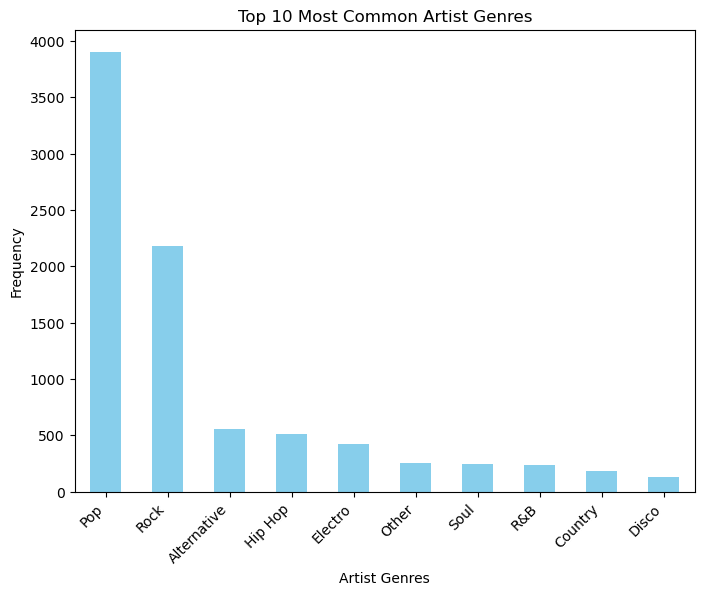

In [27]:
# Get the top 10 most common artist main genres
top_genres = songs['Artist Main Genres'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(8, 6))
top_genres.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Top 10 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

## Create Popularity Buckets

In [28]:
songs['Popularity'].describe()

count    9068.00000
mean       39.24989
std        29.38329
min         0.00000
25%         0.00000
50%        45.00000
75%        65.00000
max        98.00000
Name: Popularity, dtype: float64

## Visualization

<Figure size 2000x1000 with 0 Axes>

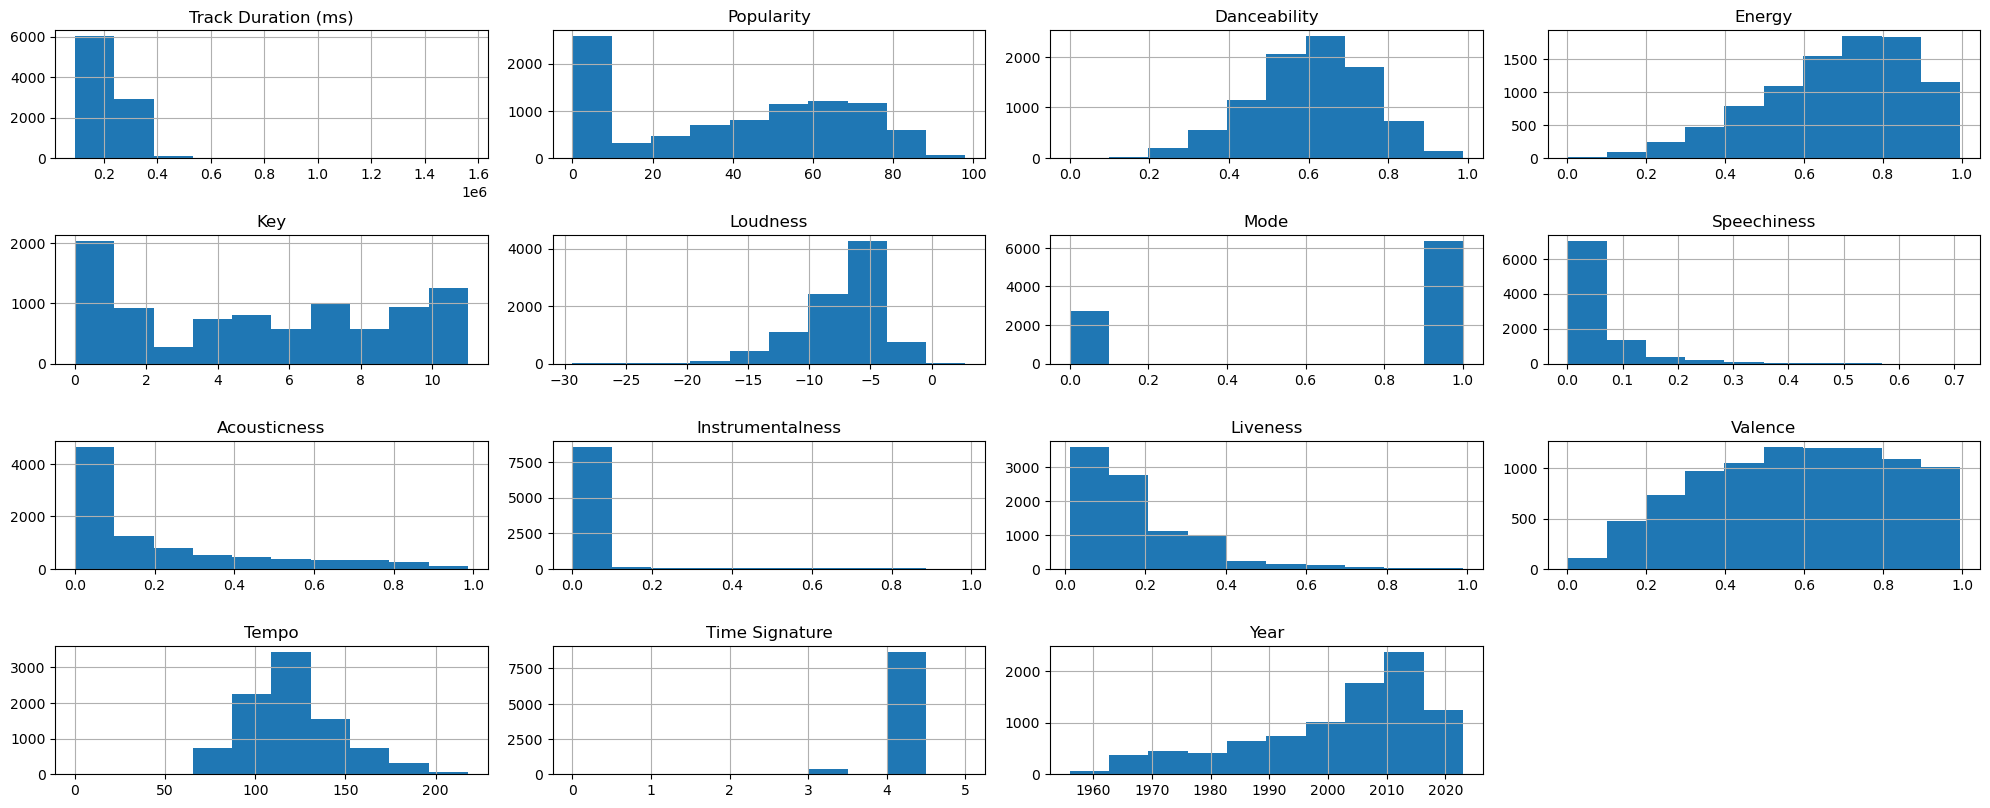

In [29]:
# Set the size of the entire figure
plt.figure(figsize=(20, 10))

# Plot histograms for each column in the DataFrame
# Adjust the layout to prevent overlap
songs.hist(layout=(5, 4), figsize=(20, 10))  # Modify the layout based on the actual number of features

# Tight layout often improves the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
# Select only numeric columns
numeric_songs = songs.select_dtypes(include=['int64', 'float64'])
# Compute correlation matrix
correlation_matrix = numeric_songs.corr()
correlation_matrix

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Year
Track Duration (ms),1.000000,0.017465,-0.046674,0.025993,0.008812,-0.063597,-0.038610,-0.027588,-0.157762,0.081843,-0.011865,-0.197626,-0.010052,0.030095,-0.073048
Popularity,0.017465,1.000000,0.060087,0.007467,0.008748,0.034254,-0.019194,0.020741,-0.022130,-0.031505,-0.032895,-0.005759,-0.006604,0.040904,-0.061963
Danceability,-0.046674,0.060087,1.000000,0.135839,-0.000304,0.098269,-0.130713,0.140689,-0.199006,0.019407,-0.092653,0.445508,-0.180788,0.164464,0.145227
Energy,0.025993,0.007467,0.135839,1.000000,0.035048,0.681631,-0.118273,0.151881,-0.630353,0.043364,0.140564,0.300230,0.171047,0.189701,0.165813
Key,0.008812,0.008748,-0.000304,0.035048,1.000000,0.020103,-0.137992,0.024962,-0.020056,0.009812,0.000331,0.004210,0.000706,0.011614,0.019437
Loudness,-0.063597,0.034254,0.098269,0.681631,0.020103,1.000000,-0.119346,0.143207,-0.454908,-0.087792,0.058924,0.018414,0.090865,0.116674,0.444757
Mode,-0.038610,-0.019194,-0.130713,-0.118273,-0.137992,-0.119346,1.000000,-0.083199,0.140586,-0.014323,-0.003415,-0.021757,-0.000732,-0.042545,-0.125776
Speechiness,-0.027588,0.020741,0.140689,0.151881,0.024962,0.143207,-0.083199,1.000000,-0.098160,-0.028315,0.091062,0.042294,0.081711,0.059183,0.164592
Acousticness,-0.157762,-0.022130,-0.199006,-0.630353,-0.020056,-0.454908,0.140586,-0.098160,1.000000,-0.042322,-0.021038,-0.135628,-0.106415,-0.176025,-0.198504
Instrumentalness,0.081843,-0.031505,0.019407,0.043364,0.009812,-0.087792,-0.014323,-0.028315,-0.042322,1.000000,-0.002134,0.019330,0.043816,0.009401,-0.055847


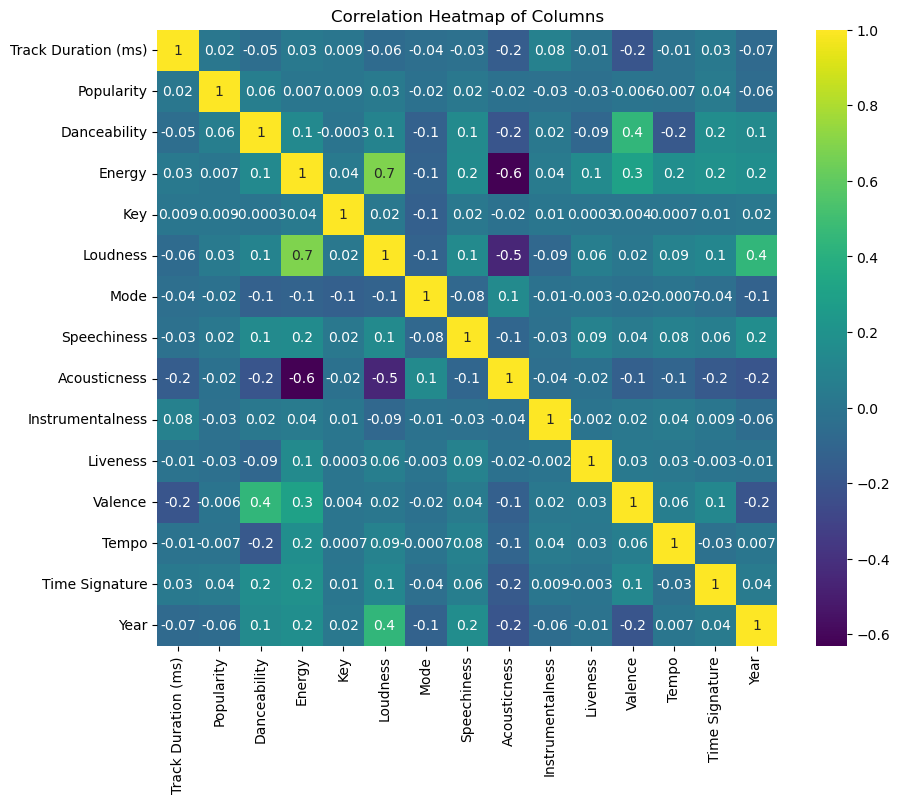

In [31]:
# Set up the heatmap figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations and using the 'viridis' colormap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.1g', cmap="viridis")

# Add a title to the plot
heatmap.set_title('Correlation Heatmap of Columns')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

- **Energy and Loudness:** There is a high positive correlation, suggesting that tracks with more energy tend to be louder.
- **Danceability and Valence:** These also show a positive correlation, indicating that tracks considered more danceable often have a happier or more positive mood.
- **Acousticness and Energy:** There is a significant negative correlation here, meaning that tracks with higher acousticness tend to have lower energy.
- **Acousticness and Loudness:** This pair also has a negative correlation, suggesting that more acoustic tracks are typically quieter.

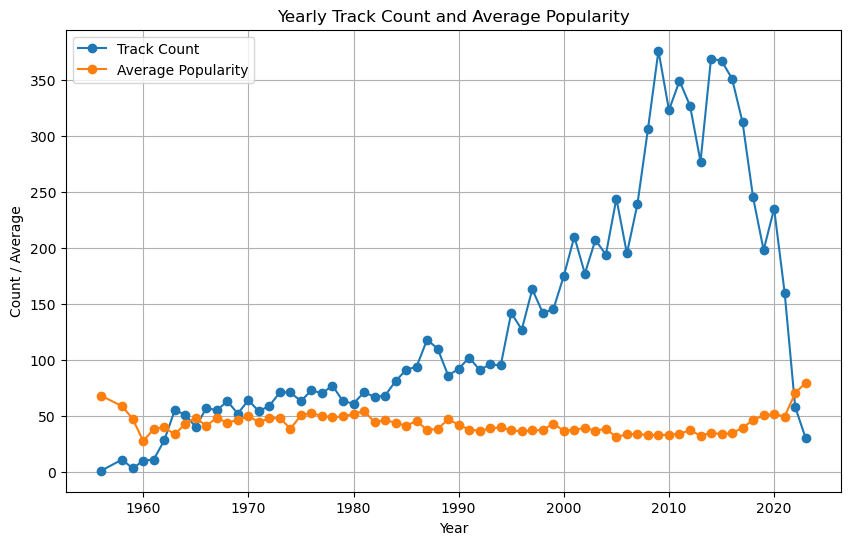

,Track Count,Average Popularity
Year,,
1956,1,68.000000
1958,11,58.545455
1959,3,47.333333
1960,10,27.500000
1961,11,38.181818
...,...,...
2019,198,50.419192
2020,235,51.489362
2021,160,49.350000


In [32]:
# Group the data by 'Year' and calculate the number of tracks and average popularity for each year
yearly_data = songs.groupby('Year').agg({'Track Name': 'count', 'Popularity': 'mean'})

# Rename the columns for clarity
yearly_data.rename(columns={'Track Name': 'Track Count', 'Popularity': 'Average Popularity'}, inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['Track Count'], label='Track Count', marker='o')
plt.plot(yearly_data.index, yearly_data['Average Popularity'], label='Average Popularity', marker='o')
plt.xlabel('Year')
plt.ylabel('Count / Average')
plt.title('Yearly Track Count and Average Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Display the yearly data
yearly_data

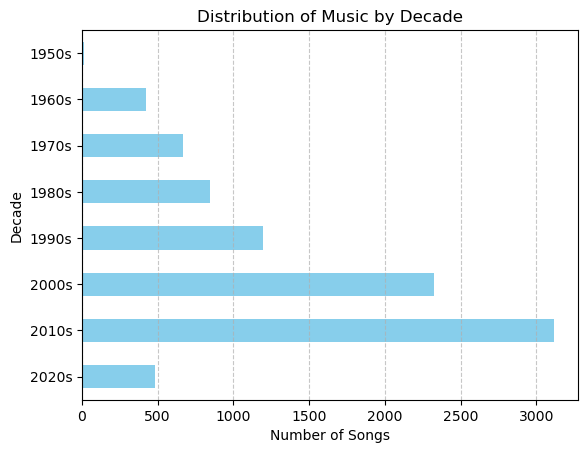

In [33]:
# Calculate the count of songs in each decade and sort by year
decades = songs['Decade'].value_counts().sort_index(ascending=False)

# Plot the distribution of music by decades
decades.plot(kind='barh', color='skyblue')  # Plotting a horizontal bar chart with skyblue color
plt.xlabel('Number of Songs')  # Label for x-axis
plt.ylabel('Decade')  # Label for y-axis
plt.title('Distribution of Music by Decade')  # Title of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()  # Display the plot

### Observation
The plot illustrates the distribution of songs by decade, with a notable peak in the 2000s and a significant decrease in the number of songs for the 2020s.

/var/folders/bj/583srb2d5dz2jkljm63jkstw0000gn/T/ipykernel_33709/25131733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.index, y=top_albums.values, palette='pastel')


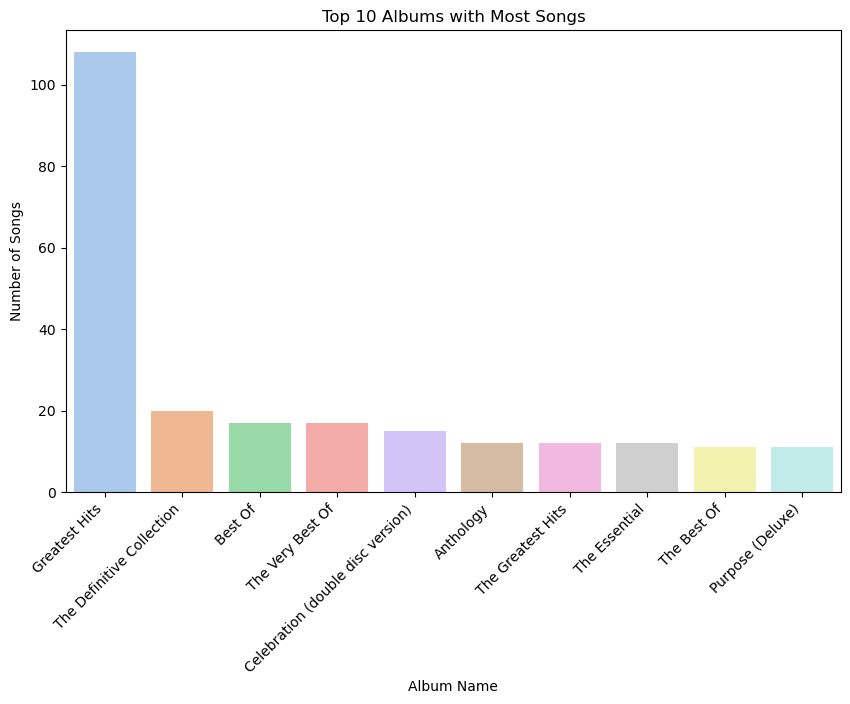

In [34]:
# Top 10 Albums with Most Songs
top_albums = songs['Album Name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_albums.index, y=top_albums.values, palette='pastel')
plt.title('Top 10 Albums with Most Songs')
plt.xlabel('Album Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

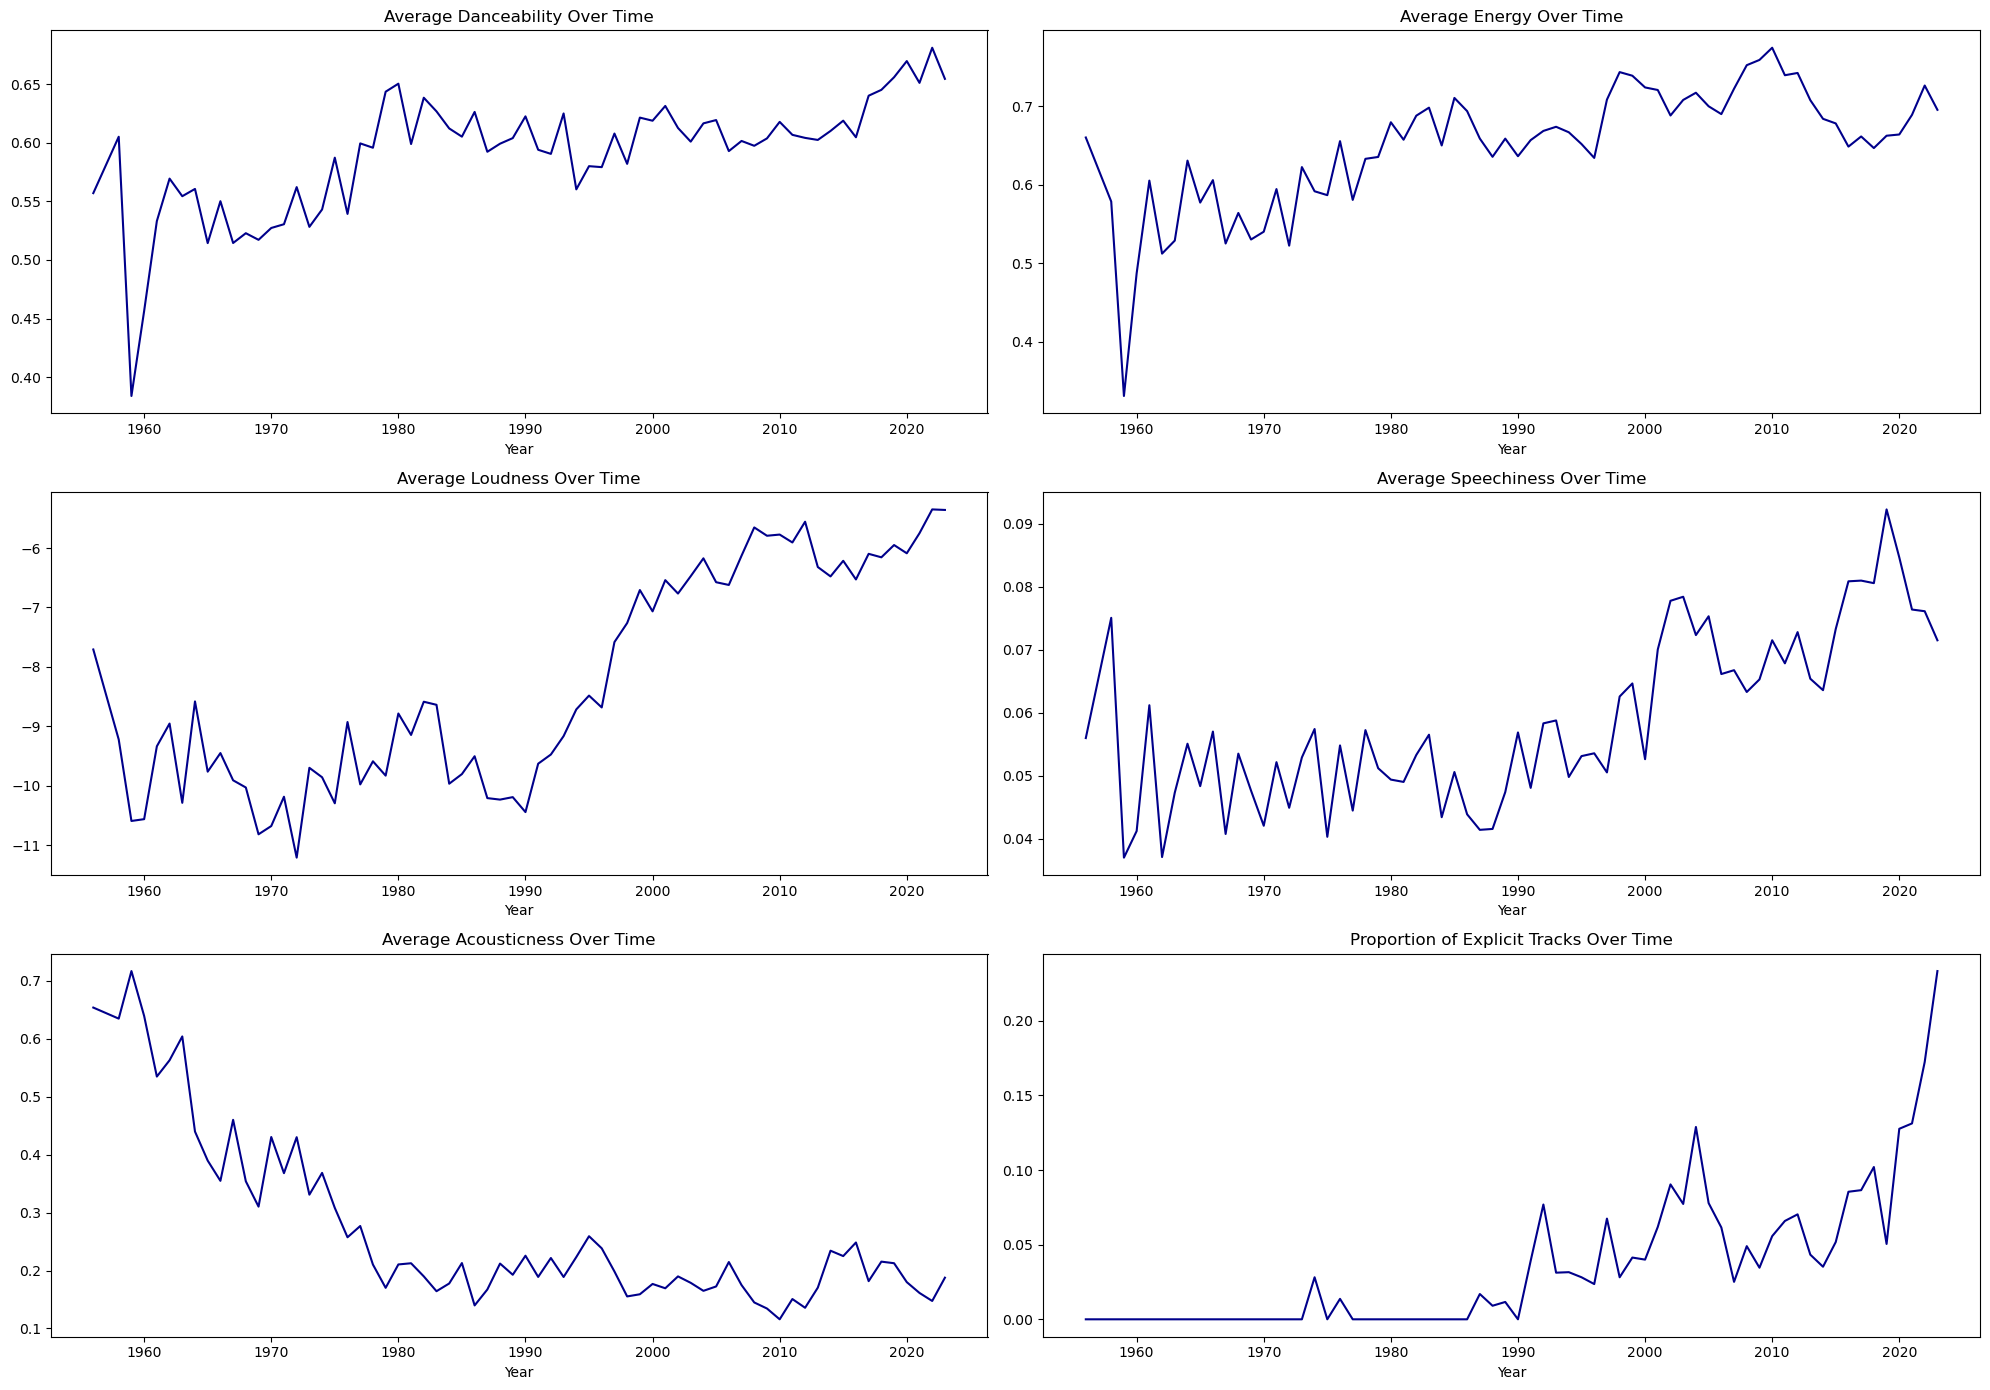

In [35]:
# Calculate the average values of song characteristics for each year
characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
average_characteristics_by_year = songs.groupby('Year')[characteristics].mean()

# Create a figure and axes for the plots
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

# Plot the average danceability over time
average_characteristics_by_year['Danceability'].plot(ax=axs[0, 0], color='darkblue')  # Change color
axs[0, 0].set_title('Average Danceability Over Time')

# Plot the average energy over time
average_characteristics_by_year['Energy'].plot(ax=axs[0, 1], color='darkblue')  # Change color
axs[0, 1].set_title('Average Energy Over Time')

# Plot the average loudness over time
average_characteristics_by_year['Loudness'].plot(ax=axs[1, 0], color='darkblue')  # Change color
axs[1, 0].set_title('Average Loudness Over Time')

# Plot the average speechiness over time
average_characteristics_by_year['Speechiness'].plot(ax=axs[1, 1], color='darkblue')  # Change color
axs[1, 1].set_title('Average Speechiness Over Time')

# Plot the average acousticness over time
average_characteristics_by_year['Acousticness'].plot(ax=axs[2, 0], color='darkblue')  # Change color
axs[2, 0].set_title('Average Acousticness Over Time')

# Plot the proportion of explicit tracks over time
songs.groupby('Year')['Explicit'].mean().plot(ax=axs[2, 1], color='darkblue')  # Change color
axs[2, 1].set_title('Proportion of Explicit Tracks Over Time')

# Adjust the layout
plt.tight_layout()
plt.show()

### Observation
The six plots depict trends in musical attributes over time, with danceability and energy showing slight increases, loudness significantly increasing, speechiness varying without a clear trend, acousticness decreasing, and the proportion of explicit tracks rising sharply in recent years.

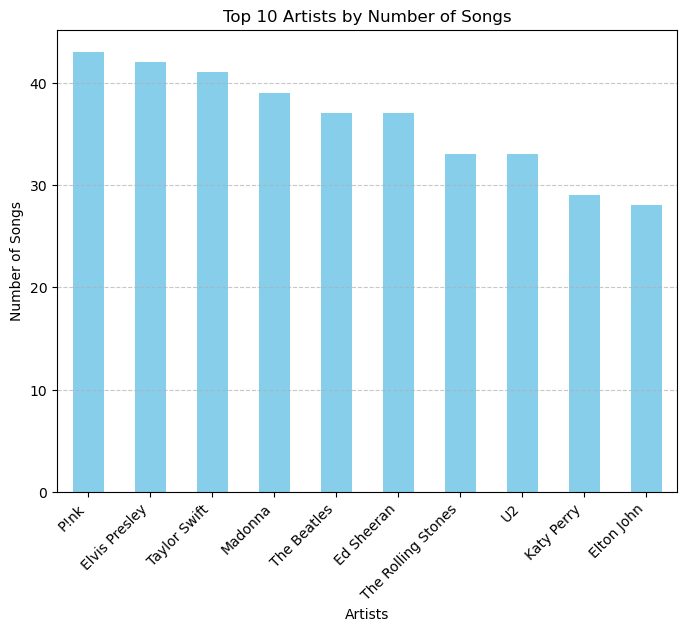

In [36]:
# Artists with most number of songs
# Calculate the count of songs by artists and select the top 10
top_artists = songs['Artist Name(s)'].value_counts().head(10)

# Plot the count of songs by artists
plt.figure(figsize=(8, 6))
top_artists.plot(kind='bar', color='skyblue')  # Plotting a bar chart with skyblue color
plt.xlabel('Artists')  # Label for x-axis
plt.ylabel('Number of Songs')  # Label for y-axis
plt.title('Top 10 Artists by Number of Songs')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()  # Display the plot

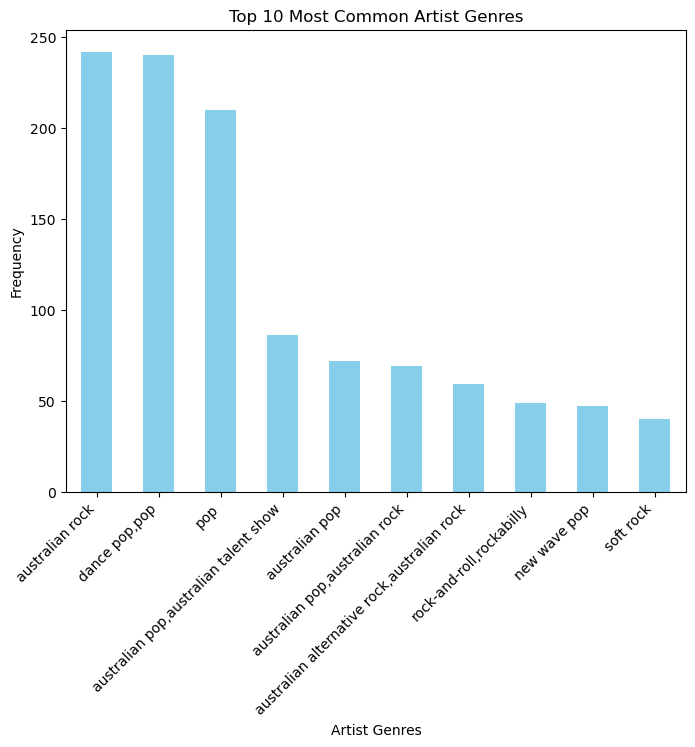

In [37]:
# Get the top 10 most common artist genres
top_genres = songs['Artist Genres'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(8, 6))
top_genres.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Top 10 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

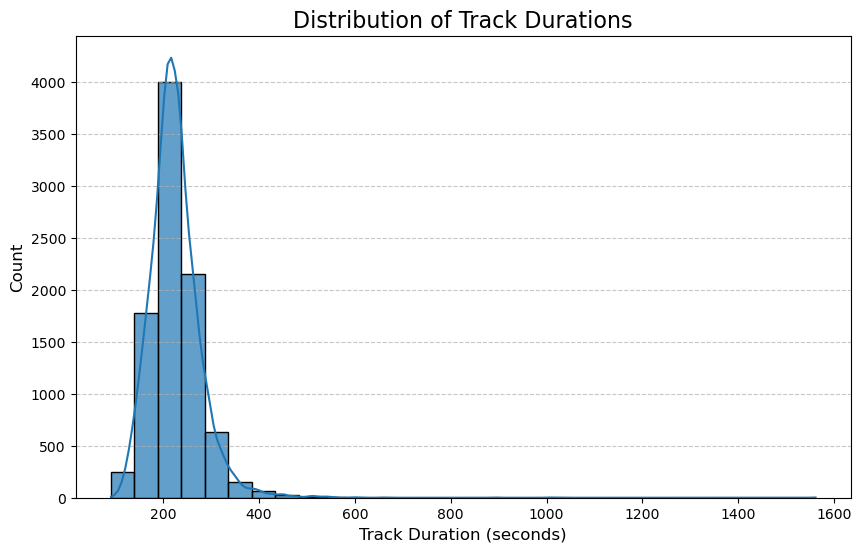

In [38]:
# Distribution of Track Durations
plt.figure(figsize=(10, 6))
sns.histplot(songs['Track Duration (ms)'] / 1000, bins=30, kde=True, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.title('Distribution of Track Durations', fontsize=16)
plt.xlabel('Track Duration (seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observation
The plot shows the distribution of track durations for a collection of songs, with most songs falling between 200 and 400 seconds in length, indicating a common duration of around 3 to 6.5 minutes for the majority of tracks.

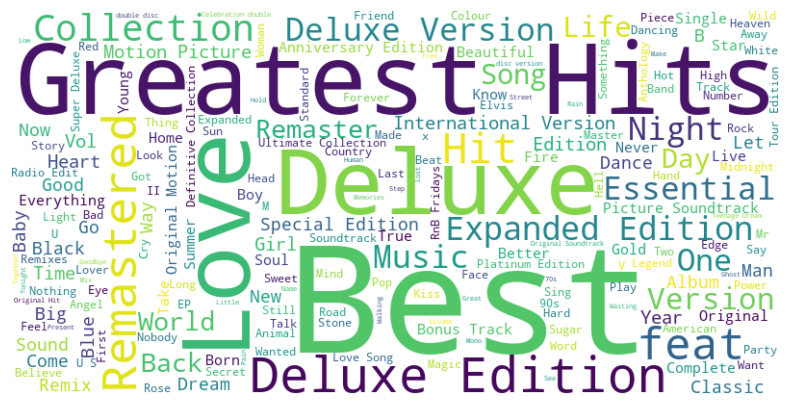

In [39]:
# Combine all artist names into a single string
all_artist_names = ' '.join(songs['Album Name'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_artist_names)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

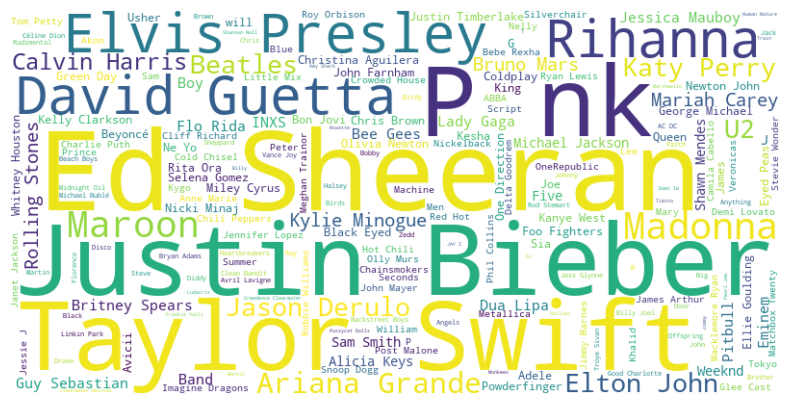

In [40]:
# Combine all artist names into a single string
all_artist_names = ' '.join(songs['Artist Name(s)'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_artist_names)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9068 entries, 2428 to 0
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9068 non-null   object 
 1   Track Name            9068 non-null   object 
 2   Artist URI(s)         9068 non-null   object 
 3   Artist Name(s)        9068 non-null   object 
 4   Album URI             9068 non-null   object 
 5   Album Name            9068 non-null   object 
 6   Album Artist Name(s)  9068 non-null   object 
 7   Album Release Date    9068 non-null   object 
 8   Track Duration (ms)   9068 non-null   int64  
 9   Explicit              9068 non-null   bool   
 10  Popularity            9068 non-null   int64  
 11  ISRC                  9068 non-null   object 
 12  Artist Genres         9068 non-null   object 
 13  Danceability          9068 non-null   float64
 14  Energy                9068 non-null   float64
 15  Key                  

In [42]:
songs.reset_index(drop=True, inplace=True)

In [43]:
songs.drop(columns=['Time Signature', 'Track Duration (ms)', 'Key'], inplace=True)

In [44]:
songs.to_pickle('cleaned_songs.pkl')